In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.ticker import FixedLocator

In [4]:
df = pd.read_csv("../Mental health 2023./CSV/World Happiness Report 2005-2021.csv")
df.shape

(2089, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   Year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [6]:
#count, mean, standard deviation, minimum, and quartiles for each numerical column.
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,2089.000000,2089.000000,2062.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000,2065.000000,2073.000000,1873.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.180326,0.745462,0.000102,0.746474,0.651421,0.270544,0.483914
std,4.455614,1.115567,1.143520,0.118935,6.948546,0.140751,0.161082,0.186136,0.105954,0.085849,0.191515
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.651972,8.473547,0.747664,58.965000,0.651689,-0.113172,0.689840,0.570057,0.207652,0.334808
50%,2014.000000,5.405246,9.463269,0.834770,64.980003,0.767357,-0.023366,0.801339,0.662837,0.260328,0.467046
75%,2017.000000,6.294282,10.347656,0.904682,68.362499,0.857677,0.090584,0.870789,0.737176,0.321706,0.616302
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.883586,0.704590,0.993604


In [7]:
# check for missing values
df.isnull().sum()

Country name                           0
Year                                   0
Life Ladder                            0
Log GDP per capita                    27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

In [8]:
#unique values
df.nunique()

Country name                          166
Year                                   17
Life Ladder                          2089
Log GDP per capita                   2062
Social support                       2076
Healthy life expectancy at birth     1076
Freedom to make life choices         2056
Generosity                           2009
Perceptions of corruption            1976
Positive affect                      2065
Negative affect                      2073
Confidence in national government    1873
dtype: int64

In [9]:
min_year = df['Year'].min()
max_year = df['Year'].max()

print(f"Zakres lat: {min_year} - {max_year}")


Zakres lat: 2005 - 2021


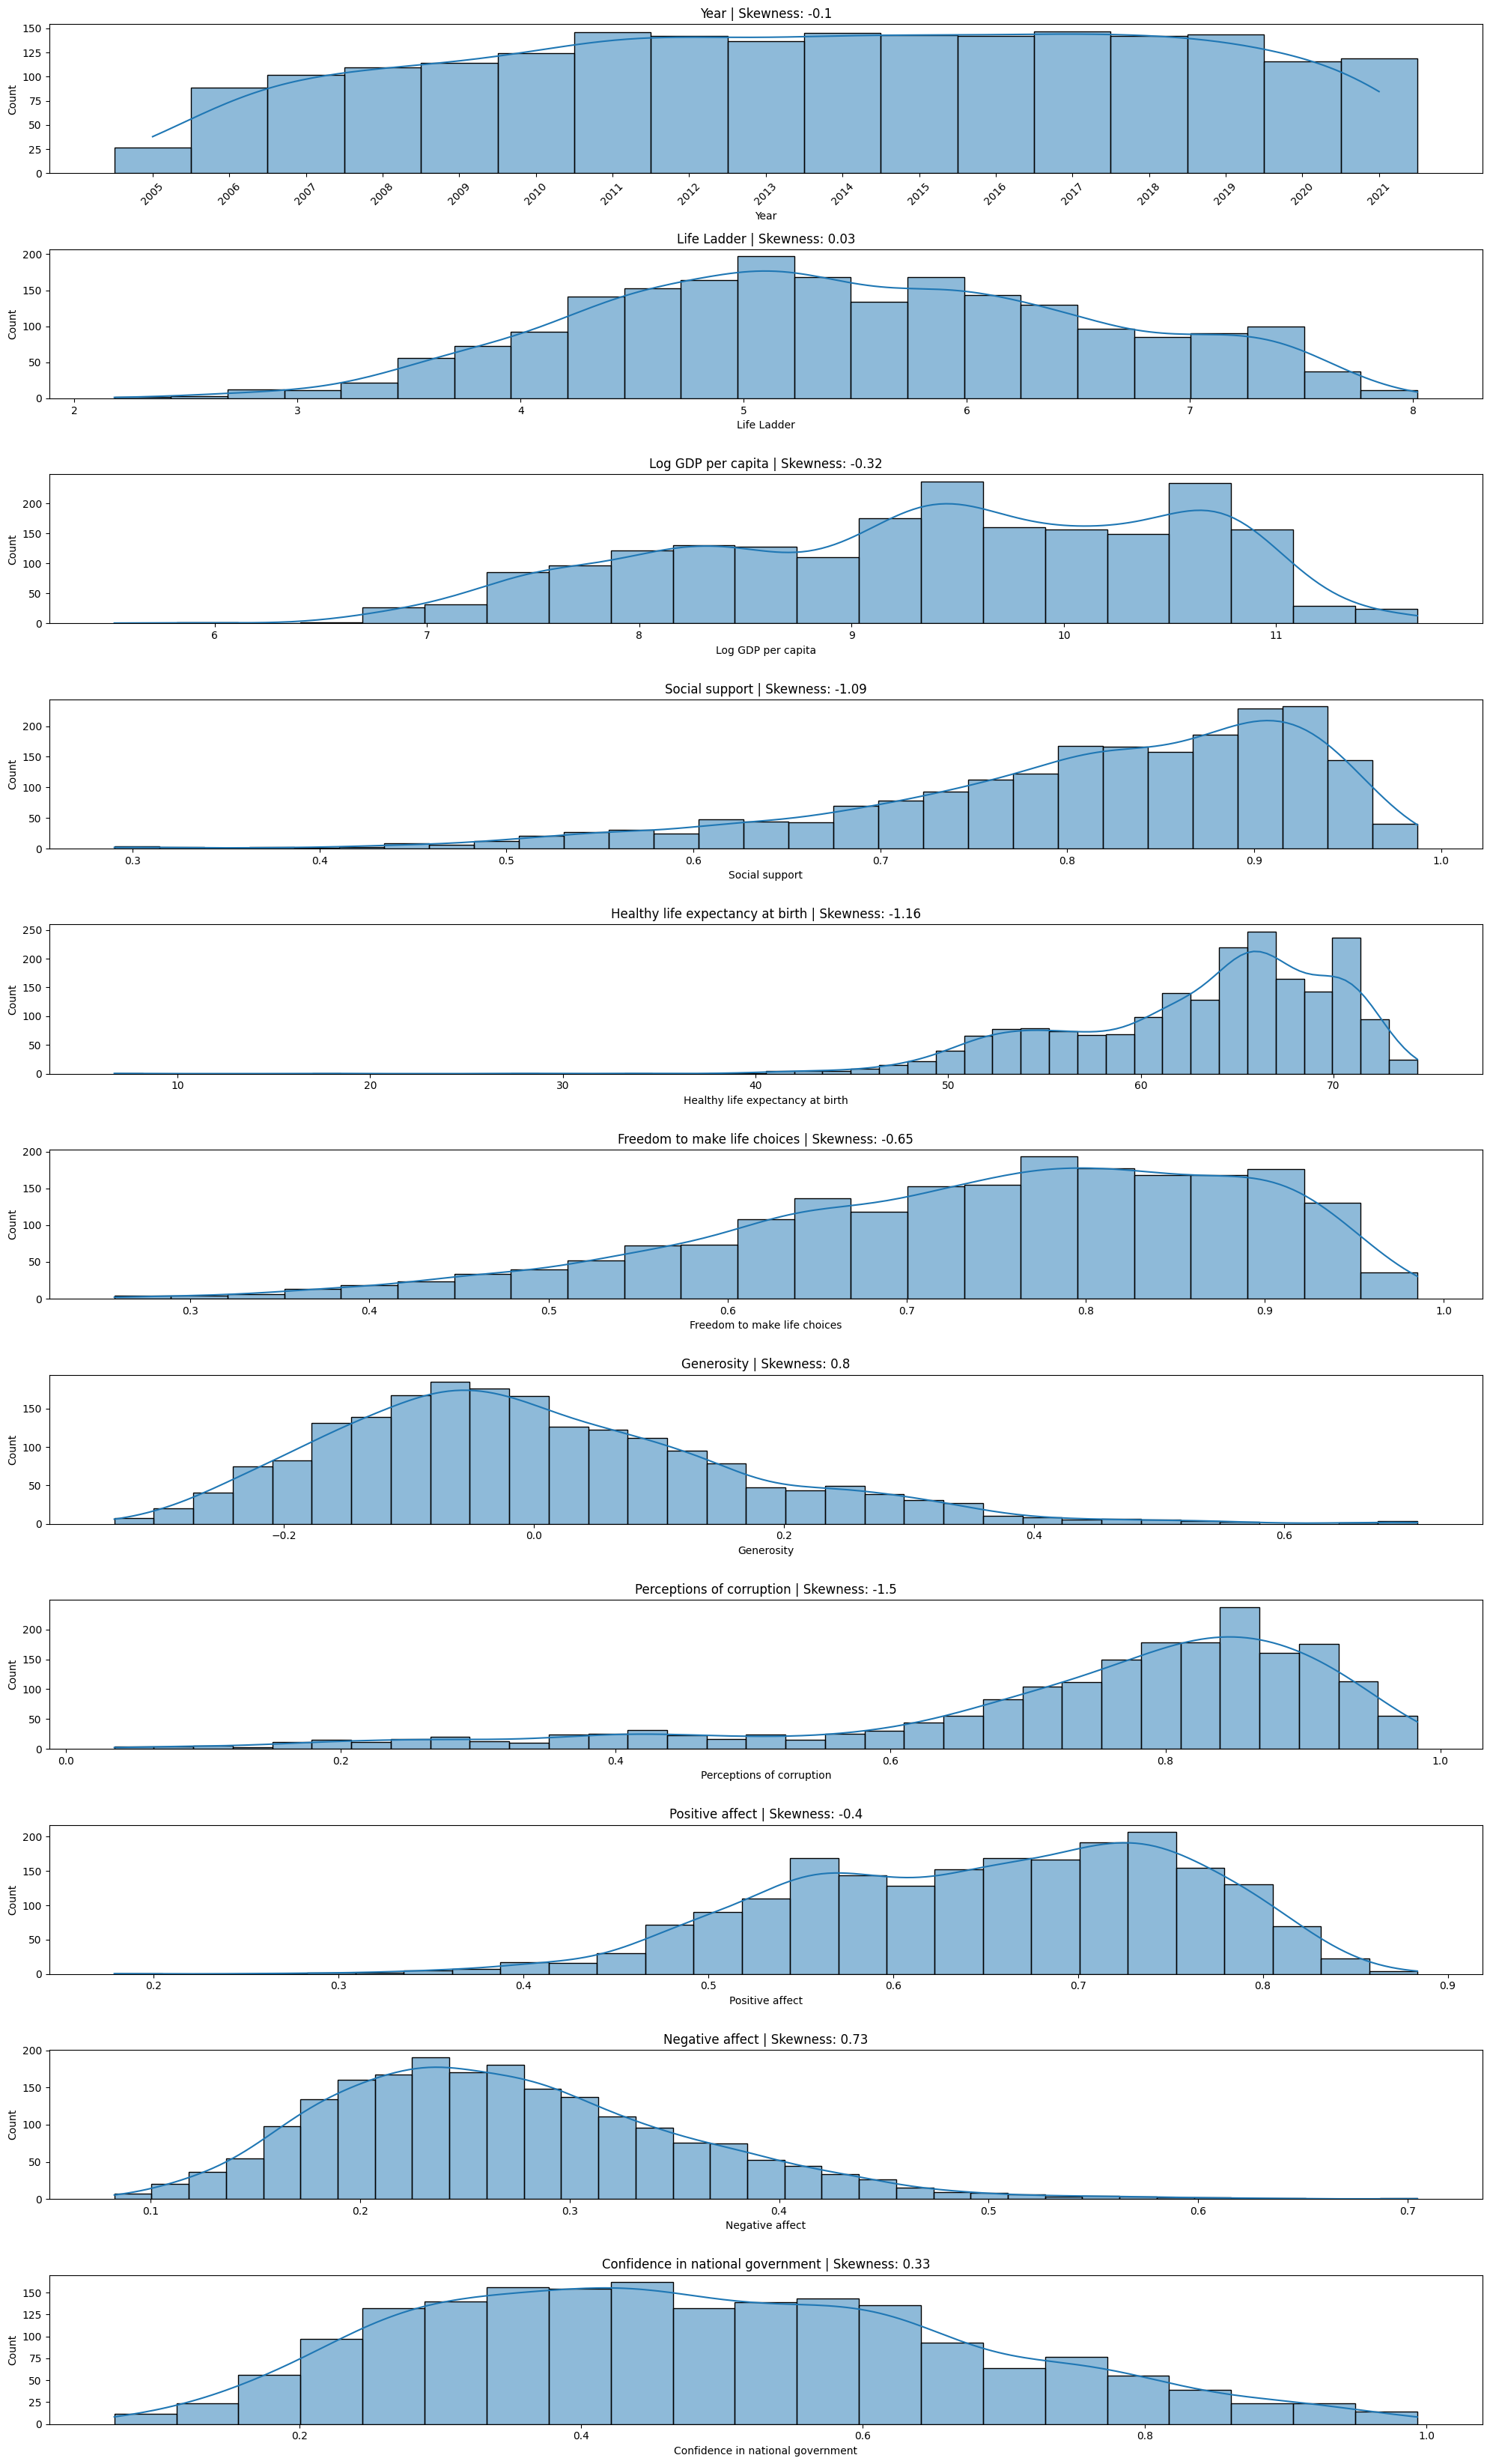

In [10]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    if feature == 'Year':
        sns.histplot(df[feature].dropna(), kde=True, discrete=True)
        unique_years = df['Year'].dropna().sort_values().unique()  
        plt.xticks(unique_years, rotation=45) 
    else:
        sns.histplot(df[feature].dropna(), kde=True)
    



plt.tight_layout()
plt.show()


                                       Year  Life Ladder  Log GDP per capita  \
Year                               1.000000     0.041821            0.070739   
Life Ladder                        0.041821     1.000000            0.782158   
Log GDP per capita                 0.070739     0.782158            1.000000   
Social support                    -0.021421     0.713881            0.681699   
Healthy life expectancy at birth   0.151268     0.713795            0.810385   
Freedom to make life choices       0.227722     0.531316            0.361541   
Generosity                        -0.014956     0.187568           -0.000836   
Perceptions of corruption         -0.077258    -0.429346           -0.343813   
Positive affect                    0.014971     0.510545            0.240360   
Negative affect                    0.206166    -0.317914           -0.225877   
Confidence in national government  0.011154    -0.080872           -0.190304   

                                   Soci

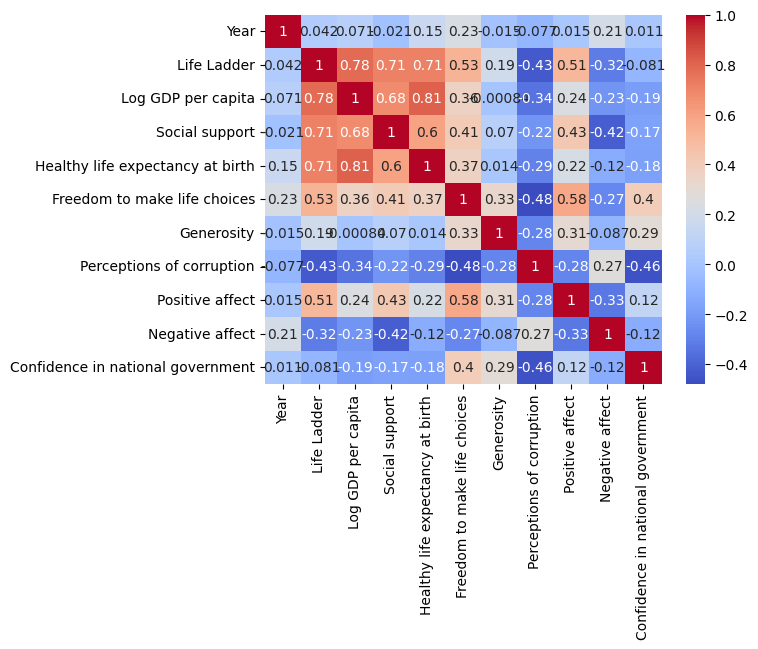

In [11]:
df_liczbowe = df.select_dtypes(include=['float64', 'int64'])
korelacja = df_liczbowe.corr()
print(korelacja)
sns.heatmap(korelacja, annot=True, cmap='coolwarm')
plt.show()